In [1]:
import pandas as pd
pd.set_option('display.max_columns',None, 'display.max_rows', None)

In [2]:
salary_data = pd.read_csv('Resources/City_PayRoll_LA.csv', low_memory=False)
salary_data.head()


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,$17829.78,$17678.24,$22946.57,$14273.91,23.67%,$74584.48,$60310.57,$0.00,$0.00,$0.00,NaN,$369.12,$13904.79,$13904.79,NaN,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,$11968.32,$14048.20,$1700.40,3.43%,$51207.45,$49507.05,$1269.83,$0.00,$239.20,$0.00,$11.13,$180.24,$1689.27,24,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,$21153.60,$24360.49,$4120.20,4.85%,$89029.61,$84909.41,$1954.51,$0.00,$1519.00,$0.00,$482.29,$164.40,$3637.91,24,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,$16471.18,$21110.80,$14275.44,24.76%,$71936.24,$57660.80,$0.00,$1585.72,$935.00,$0.00,$11504.72,$250.00,$2770.72,12,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,$15257.17,$17313.10,$5191.62,8.74%,$64583.37,$59391.75,$0.00,$4774.25,$0.00,$0.00,$417.37,$0.00,$4774.25,03,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [3]:
salary_data.dropna(subset=['Total Payments'], inplace=True)
columns_replace = [ 'Hourly or Event Rate', 'Projected Annual Salary', 'Q1 Payments',
       'Q2 Payments', 'Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay',
        'Total Payments', 'Base Pay', 'Permanent Bonus Pay',
       'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Lump Sum Pay',
       'Overtime Pay', 'Other Pay & Adjustments',
       'Other Pay (Payroll Explorer)', 'Average Health Cost', 'Average Dental Cost',
       'Average Basic Life', 'Average Benefit Cost']


for col in columns_replace:
    salary_data[col]=salary_data[col].str.replace('$','').astype(float)

In [4]:
# salary_data.columns
salary_data.head()
len(salary_data)

285008

In [5]:
salary_data['% Over Base Pay']=salary_data['% Over Base Pay'].str.replace('%','')
salary_data.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,17829.78,17678.24,22946.57,14273.91,23.67,74584.48,60310.57,0.00,0.00,0.0,NaN,369.12,13904.79,13904.79,NaN,NaN,98,1230,NaN,16842.08,1282.61,0.00,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43,51207.45,49507.05,1269.83,0.00,239.2,0.0,11.13,180.24,1689.27,24,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85,89029.61,84909.41,1954.51,0.00,1519.0,0.0,482.29,164.40,3637.91,24,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76,71936.24,57660.80,0.00,1585.72,935.0,0.0,11504.72,250.00,2770.72,12,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74,64583.37,59391.75,0.00,4774.25,0.0,0.0,417.37,0.00,4774.25,03,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [6]:
cols = salary_data.columns[9:17]
cols

Index(['Q1 Payments', 'Q2 Payments', 'Q3 Payments', 'Q4 Payments',
       'Payments Over Base Pay', '% Over Base Pay', 'Total Payments',
       'Base Pay'],
      dtype='object')

In [7]:
import numpy as np
salary_data = salary_data.replace(0,np.nan).dropna(axis=0, how='all')
salary_data.dropna(subset=cols, inplace=True)
salary_data.head()
# cleaned_csv = salary_data.to_csv('Output/Final_Cleaned.csv', index=False)

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,70386.48,16129.89,17829.78,17678.24,22946.57,14273.91,23.67,74584.48,60310.57,NaN,NaN,NaN,NaN,369.12,13904.79,13904.79,NaN,NaN,98,1230,NaN,16842.08,1282.61,NaN,18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,25.12,52450.56,11331.00,13859.93,11968.32,14048.20,1700.40,3.43,51207.45,49507.05,1269.83,NaN,239.2,NaN,11.13,180.24,1689.27,24,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,42.77,89303.76,20036.32,23479.20,21153.60,24360.49,4120.20,4.85,89029.61,84909.41,1954.51,NaN,1519.0,NaN,482.29,164.40,3637.91,24,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,28.75,60028.96,15793.88,18560.38,16471.18,21110.80,14275.44,24.76,71936.24,57660.80,NaN,1585.72,935.0,NaN,11504.72,250.00,2770.72,12,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,30.92,64553.13,14700.00,17313.10,15257.17,17313.10,5191.62,8.74,64583.37,59391.75,NaN,4774.25,NaN,NaN,417.37,NaN,4774.25,03,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [8]:
salary_data['Department Title'].nunique()

58

In [9]:
salary_data['Department Title'].value_counts()

Police (LAPD)                                                   36922
Water And Power (DWP)                                           27464
Recreation And Parks                                            11974
Fire (LAFD)                                                     10185
Airports (LAWA)                                                  9391
Public Works - Sanitation                                        6812
Transportation (LADOT)                                           4929
General Services                                                 3965
Library                                                          3015
Harbor (Port of LA)                                              2524
Public Works - Street Services                                   2484
Building and Safety                                              2236
City Attorney                                                    2056
Public Works - Engineering                                       1691
Housing And Communit

In [10]:
group_salary = salary_data.groupby('Department Title').nunique()
select_data = group_salary[group_salary['Total Payments']>5000]
select_index = select_data.index
group_salary.sort_values('Total Payments', ascending = False)
select_data
select_index

Index(['Airports (LAWA)', 'Fire (LAFD)', 'Police (LAPD)',
       'Public Works - Sanitation', 'Recreation And Parks',
       'Water And Power (DWP)'],
      dtype='object', name='Department Title')

In [11]:
dataset = salary_data.loc[salary_data['Department Title'].isin(select_index)].copy(deep=True)
dataset = dataset.sort_values('Total Payments', ascending = False)
dataset.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
168006,123010,2015,Fire (LAFD),3001.0,1081092723,Fire Captain I,Full Time,63.51,132603.66,95633.26,107862.25,122415.22,122683.60,327765.53,271.26,448594.33,120828.80,9967.6,NaN,1088.0,2137.63,311315.62,3256.68,16449.91,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,1,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
142297,162626,2015,Water And Power (DWP),NaN,2720285819,Electrical Service Manager,Full Time,123.12,257074.56,78928.80,58554.62,156964.90,130418.51,294852.11,226.78,424866.83,130014.72,NaN,NaN,NaN,NaN,NaN,294852.11,294852.11,M,MANAGEMENT EMPLOYEES UNIT,98,5265,NaN,17486.94,1268.69,NaN,18755.63,DWP,http://per.lacity.org/perspecs/5265.pdf
155335,123011,2015,Fire (LAFD),3001.0,2236794545,Fire Captain I,Full Time,63.39,132347.88,87225.34,92065.04,127257.45,98818.97,284538.00,235.49,405366.80,120828.80,9690.4,NaN,1088.0,NaN,273495.60,264.00,11042.40,23,FIREFIGHTERS & FIRE CAPTAINS,38,2142,1,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2142.pdf
119602,123012,2015,Fire (LAFD),3001.0,2837442648,Firefighter III,Full Time,39.64,82766.83,74708.81,105354.78,117150.25,107094.21,317149.65,363.88,404308.05,87158.40,19752.4,7410.0,1088.0,NaN,286732.56,2166.69,30417.09,23,FIREFIGHTERS & FIRE CAPTAINS,38,2112,3,13031.40,896.76,178.68,14106.84,Fire,http://per.lacity.org/perspecs/2112.pdf
46520,103240,2014,Water And Power (DWP),NaN,3314958958,Power Engineering Manager,Full Time,NaN,258494.40,67843.00,78582.83,67931.00,188913.96,181955.59,82.22,403270.79,221315.20,1284.8,NaN,NaN,NaN,NaN,180670.79,181955.59,NaN,NaN,98,9453,NaN,16842.08,1282.61,NaN,18124.69,DWP,http://per.lacity.org/perspecs/9453.pdf


In [12]:
dataset['Department Title'].unique()

array(['Fire (LAFD)', 'Water And Power (DWP)', 'Police (LAPD)',
       'Airports (LAWA)', 'Public Works - Sanitation',
       'Recreation And Parks'], dtype=object)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Department Title', ylabel='Total Payments'>

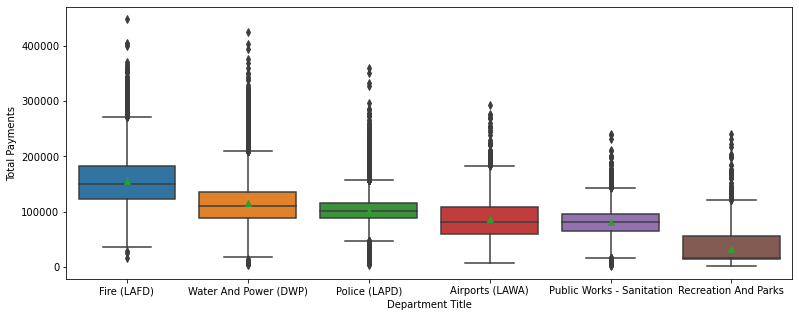

In [14]:
fig, ax = plt.subplots(figsize = (13,5))
# sns.stripplot(x='Department Title',y='Total Payments', data = dataset, alpha = 0.2, ax = ax,hue ='Year')
sns.boxplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)

<AxesSubplot:xlabel='Department Title', ylabel='Total Payments'>

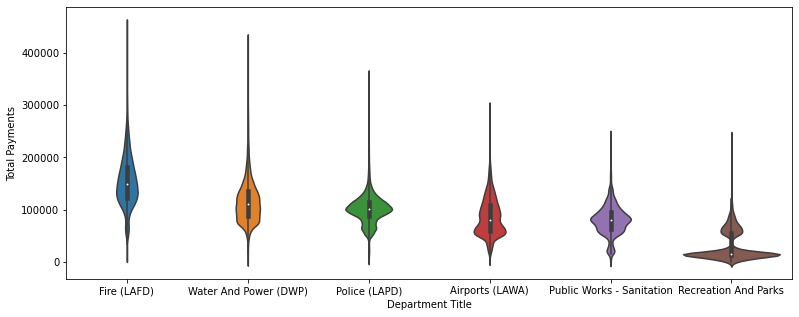

In [15]:
fig, ax = plt.subplots(figsize = (13,5))
sns.violinplot(x='Department Title',y='Total Payments', data = dataset, ax = ax, showmeans=True)

<AxesSubplot:xlabel='Department Title', ylabel='Base Pay'>

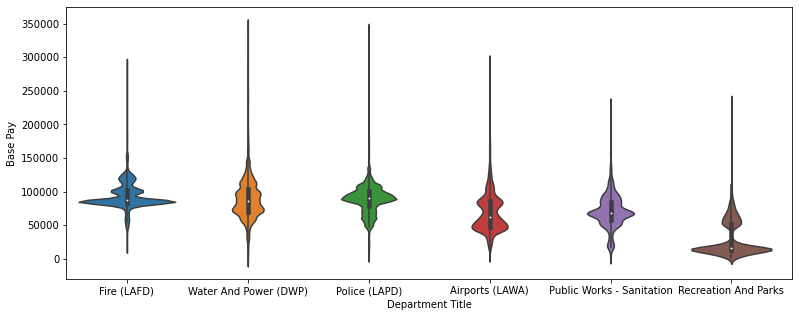

In [16]:
fig, ax = plt.subplots(figsize = (13,5))
sns.violinplot(x='Department Title',y='Base Pay', data = dataset, ax = ax, showmeans=True)

<AxesSubplot:xlabel='Department Title', ylabel='Base Pay'>

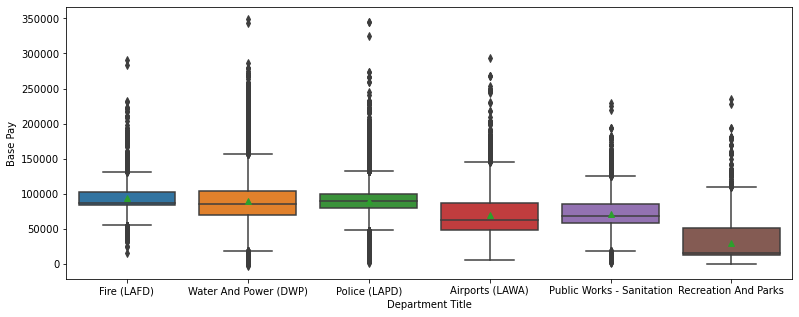

In [17]:
fig, ax = plt.subplots(figsize = (13,5))
# sns.stripplot(x='Department Title',y='Total Payments', data = dataset, alpha = 0.2, ax = ax,hue ='Year')
sns.boxplot(x='Department Title',y='Base Pay', data = dataset, ax = ax, showmeans=True)

In [18]:
# police_df = dataset.loc[(dataset['Department Title']=='Water And Power (DWP)') & (dataset['Total Payments']<=300000)]
# # fig, ax = plt.subplots(figsize = (13,5))
# sns.histplot(data=police_df, x='Total Payments', hue='Department Title', element='step').set_title('Histogram of Total Payments of Police')

In [19]:
grouped_df = dataset.groupby(['Department Title'])
grouped_df['Job Class Title'].nunique()

Department Title
Airports (LAWA)              307
Fire (LAFD)                  115
Police (LAPD)                188
Public Works - Sanitation    201
Recreation And Parks         194
Water And Power (DWP)        341
Name: Job Class Title, dtype: int64

In [20]:
import numpy as np
wp_df = dataset[(dataset['Department Title']=='Water And Power (DWP)')]
wp_df.head()

# fig, ax = plt.subplots(figsize=(18,5))
# sns.histplot(data=wp_df, x='Job Class Title')
# ax.tick_params(rotation=90)

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
142297,162626,2015,Water And Power (DWP),NaN,2720285819,Electrical Service Manager,Full Time,123.12,257074.56,78928.80,58554.62,156964.90,130418.51,294852.11,226.78,424866.83,130014.72,NaN,NaN,NaN,NaN,NaN,294852.11,294852.11,M,MANAGEMENT EMPLOYEES UNIT,98,5265,NaN,17486.94,1268.69,NaN,18755.63,DWP,http://per.lacity.org/perspecs/5265.pdf
46520,103240,2014,Water And Power (DWP),NaN,3314958958,Power Engineering Manager,Full Time,NaN,258494.40,67843.00,78582.83,67931.00,188913.96,181955.59,82.22,403270.79,221315.20,1284.80,NaN,NaN,NaN,NaN,180670.79,181955.59,NaN,NaN,98,9453,NaN,16842.08,1282.61,NaN,18124.69,DWP,http://per.lacity.org/perspecs/9453.pdf
158047,162627,2015,Water And Power (DWP),NaN,2973354356,Electrical Distribution Mechanic Supervisor,Full Time,72.73,151860.24,90521.02,73177.18,121420.58,109430.61,288242.48,271.14,394549.39,106306.91,16635.42,15977.21,NaN,NaN,191697.49,63932.36,96544.99,B,SUPERVISORY BLUE COLLAR UNIT,98,3873,NaN,17486.94,1268.69,NaN,18755.63,DWP,http://per.lacity.org/perspecs/3873.pdf
97399,103241,2014,Water And Power (DWP),NaN,2973354356,Electrical Distribution Mechanic Supervisor,Full Time,NaN,151860.24,80191.36,91868.20,112020.87,92235.16,270518.32,255.69,376315.59,105797.27,17033.59,16311.10,NaN,NaN,199385.01,37788.62,71133.31,NaN,NaN,98,3873,NaN,16842.08,1282.61,NaN,18124.69,DWP,http://per.lacity.org/perspecs/3873.pdf
157748,162628,2015,Water And Power (DWP),NaN,3707730741,Transmission & Distribution District Supervisor,Full Time,89.34,186541.92,86893.12,74427.28,82595.09,126293.38,184381.67,99.22,370208.87,185827.20,NaN,NaN,NaN,NaN,93271.04,91110.63,91110.63,M,MANAGEMENT EMPLOYEES UNIT,98,3875,NaN,17486.94,1268.69,NaN,18755.63,DWP,http://per.lacity.org/perspecs/3875.pdf


In [21]:
# fig, ax = plt.subplots(figsize=(18,5))
# sns.countplot(x='Job Class Title', data=wp_df, order=wp_df['Job Class Title'].value_counts().index)
# ax.tick_params(rotation=90)

In [22]:
wp_count = wp_df['Job Class Title'].value_counts()
wp_count

Commercial Service Representative                          1705
Electric Distribution Mechanic                             1484
Senior Clerk Typist                                        1133
Electrical Engineering Associate                           1053
Electrical Mechanic                                         865
Civil Engineering Associate                                 805
Water Utility Worker                                        734
Security Officer                                            692
Electric Station Operator                                   645
Electrical Craft Helper                                     626
Maintenance Construction Helper                             560
Meter Reader                                                489
Construction Electrical Mechanic                            411
Custodian                                                   383
Management Analyst                                          371
Commercial Field Representative         

In [23]:
len(wp_df)

27464

In [24]:
job_titles = wp_count[wp_count>1000].index
job_titles

Index(['Commercial Service Representative', 'Electric Distribution Mechanic',
       'Senior Clerk Typist', 'Electrical Engineering Associate'],
      dtype='object')

In [25]:
#filtering fire_df for interested job titles
wp_df_final = wp_df[wp_df['Job Class Title'].isin(job_titles)].copy(deep=True)
wp_df_final.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,Q3 Payments,Q4 Payments,Payments Over Base Pay,% Over Base Pay,Total Payments,Base Pay,Permanent Bonus Pay,Longevity Bonus Pay,Temporary Bonus Pay,Lump Sum Pay,Overtime Pay,Other Pay & Adjustments,Other Pay (Payroll Explorer),MOU,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
60159,46770,2013,Water And Power (DWP),NaN,93717895,Electrical Engineering Associate,Full Time,NaN,133130.88,53308.48,87022.97,74614.80,88694.49,172122.99,130.87,303640.74,131517.75,NaN,NaN,NaN,NaN,162272.36,9850.63,9850.63,NaN,NaN,98,7525,NaN,15860.53,1250.49,NaN,17111.02,DWP,http://per.lacity.org/perspecs/7525.pdf
101643,46771,2013,Water And Power (DWP),NaN,687873419,Electric Distribution Mechanic,Full Time,NaN,115236.72,58517.27,80591.60,76839.22,84119.74,190784.63,174.58,300067.83,109283.20,NaN,13757.52,NaN,NaN,162260.48,14766.63,28524.15,NaN,NaN,98,3879,NaN,15860.53,1250.49,NaN,17111.02,DWP,http://per.lacity.org/perspecs/3879.pdf
162191,162659,2015,Water And Power (DWP),NaN,93717895,Electrical Engineering Associate,Full Time,63.76,133130.88,86387.68,75393.12,68111.59,59908.39,158187.39,120.19,289800.78,131613.39,NaN,NaN,NaN,NaN,141789.51,16397.88,16397.88,3,PROFESSIONAL UNIT,98,7525,NaN,17486.94,1268.69,NaN,18755.63,DWP,http://per.lacity.org/perspecs/7525.pdf
164041,162663,2015,Water And Power (DWP),NaN,1462455289,Electric Distribution Mechanic,Full Time,57.77,120623.76,84864.99,60422.58,76609.06,65137.86,173204.60,152.16,287034.49,113829.89,NaN,12990.20,NaN,NaN,142796.75,17417.65,30407.85,8,OPERATING MAINTENANCE AND SERVICE UNIT,98,3879,NaN,17486.94,1268.69,NaN,18755.63,DWP,http://per.lacity.org/perspecs/3879.pdf
161000,162667,2015,Water And Power (DWP),NaN,1689127711,Electric Distribution Mechanic,Full Time,56.36,117679.68,71843.73,66220.00,75958.39,71950.04,177861.70,164.52,285972.16,108110.46,NaN,6360.12,NaN,NaN,141750.70,29750.88,36111.00,8,OPERATING MAINTENANCE AND SERVICE UNIT,98,3879,NaN,17486.94,1268.69,NaN,18755.63,DWP,http://per.lacity.org/perspecs/3879.pdf


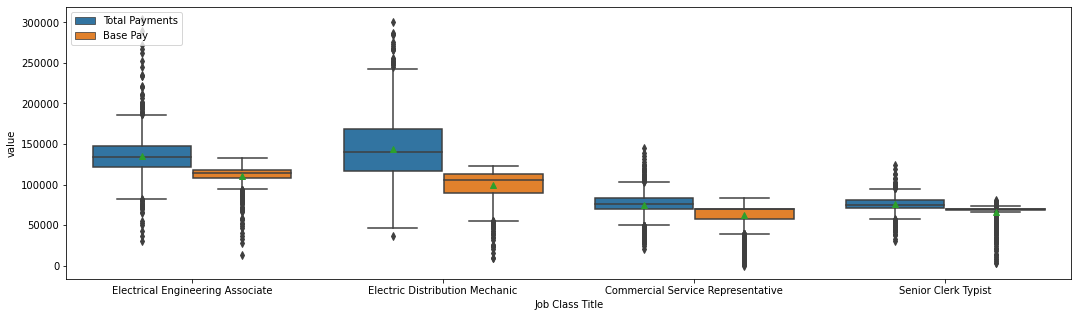

In [26]:
fig, ax = plt.subplots(figsize=(18,5))
dd=pd.melt(wp_df_final,id_vars=['Job Class Title'],value_vars=['Total Payments', 'Base Pay'],var_name='test')
sns.boxplot(x='Job Class Title',y='value',data=dd,hue='test', showmeans=True)
plt.legend(loc='upper left')
ax.tick_params(rotation=0)

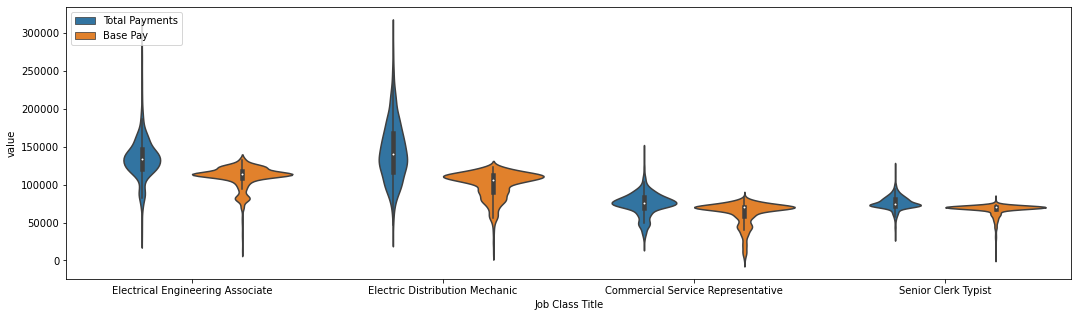

In [27]:
fig, ax = plt.subplots(figsize=(18,5))
dd=pd.melt(wp_df_final,id_vars=['Job Class Title'],value_vars=['Total Payments', 'Base Pay'],var_name='test')
sns.violinplot(x='Job Class Title',y='value',data=dd,hue='test')
plt.legend(loc='upper left')
ax.tick_params(rotation=0)

In [28]:
# fig, ax = plt.subplots(figsize=(18,5))
# sns.histplot(data=wp_df_final, x='Job Class Title', hue='Year', element='bars', ).set_title('Histogram of Job Class Titles')
# ax.tick_params(rotation=90)

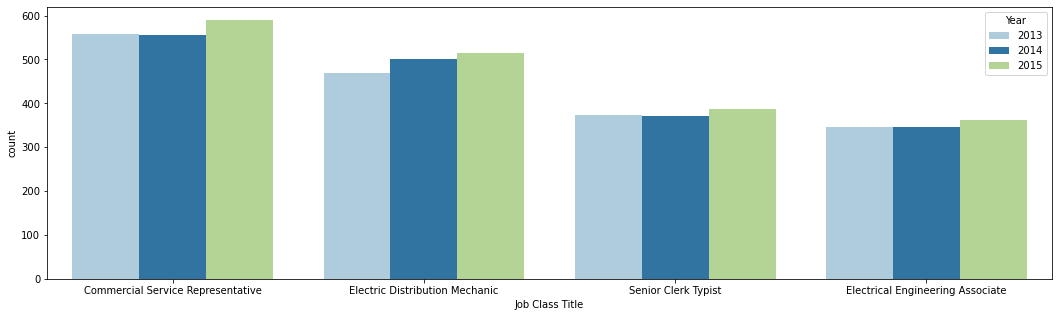

In [29]:
sns.set_palette(sns.color_palette("Paired"))
fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(x='Job Class Title', data=wp_df_final, order=wp_df_final['Job Class Title'].value_counts().index, hue='Year')
ax.tick_params(rotation=0)


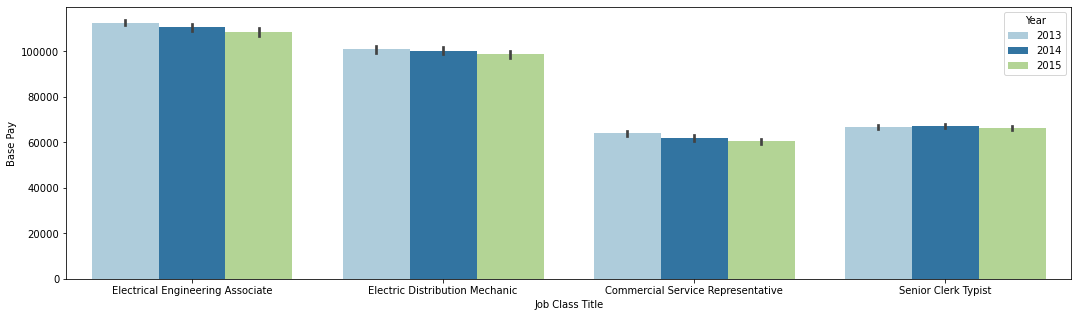

In [30]:
sns.set_palette(sns.color_palette("Paired"))
fig, ax = plt.subplots(figsize=(18,5))
sns.barplot(x='Job Class Title', data=wp_df_final, y='Base Pay', hue='Year')
ax.tick_params(rotation=0)


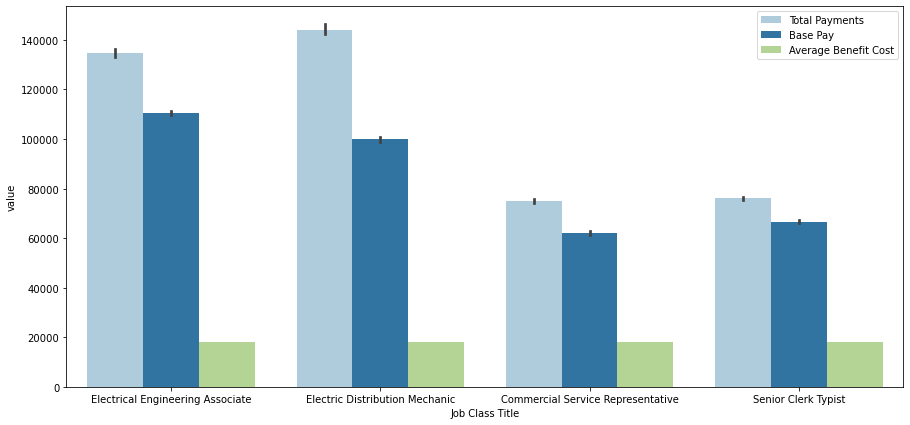

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
wp_data=pd.melt(wp_df_final,id_vars=['Job Class Title'],value_vars=['Total Payments','Base Pay', 'Average Benefit Cost'],var_name='Year')
sns.set_palette(sns.color_palette("Paired"))
sns.barplot(x='Job Class Title',y='value',data=wp_data,hue='Year')
ax.tick_params(rotation=0)
plt.legend(loc='upper right')

In [32]:
# fig, ax = plt.subplots(figsize=(18,5))
# sns.countplot(x='Job Class Title', data=wp_df_final, order=wp_df_final['Base Pay'].value_counts().index, hue='Year')
# ax.tick_params(rotation=90)

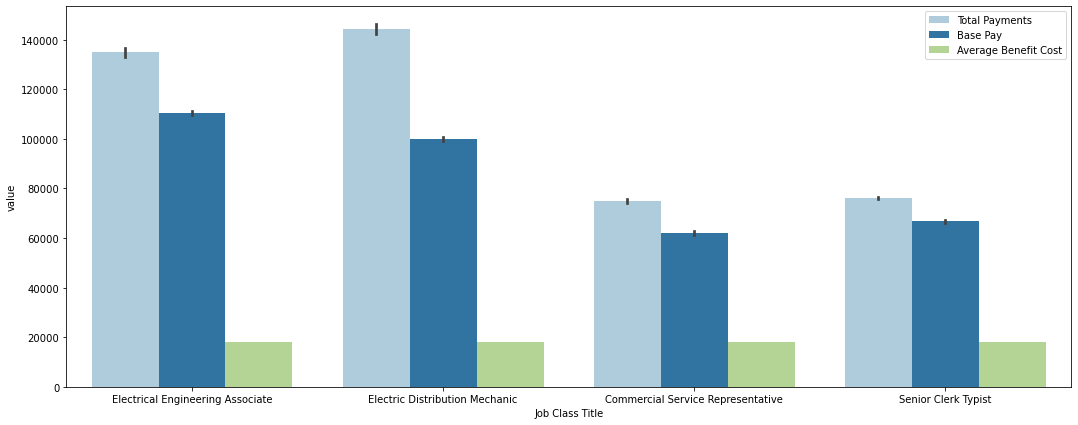

In [33]:
fig, ax = plt.subplots(figsize=(18,7))
dd=pd.melt(wp_df_final,id_vars=['Job Class Title'],value_vars=['Total Payments','Base Pay', 'Average Benefit Cost'],var_name='Year')
sns.barplot(x='Job Class Title',y='value',data=dd,hue='Year')
ax.tick_params(rotation=0)
plt.legend(loc='best')

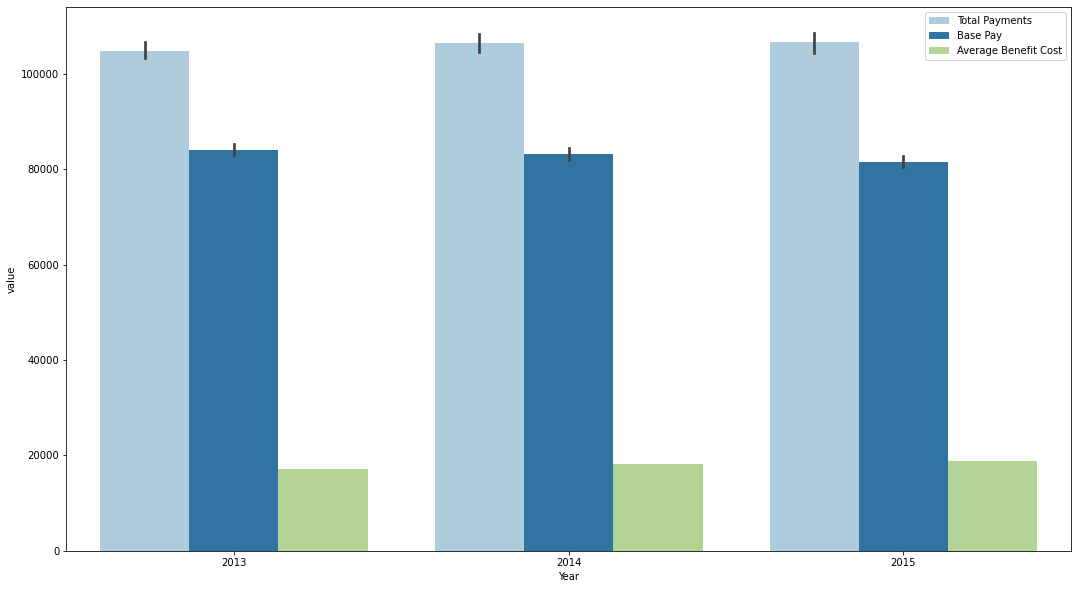

In [34]:
sns.set_palette(sns.color_palette("Paired"))
fig, ax = plt.subplots(figsize=(18,10))
dd=pd.melt(wp_df_final,id_vars=['Year'],value_vars=['Total Payments','Base Pay', 'Average Benefit Cost'],var_name='Job Class Title')
sns.barplot(x='Year',y='value',data=dd,hue='Job Class Title')
ax.tick_params(rotation=0)

plt.legend(loc='upper right')

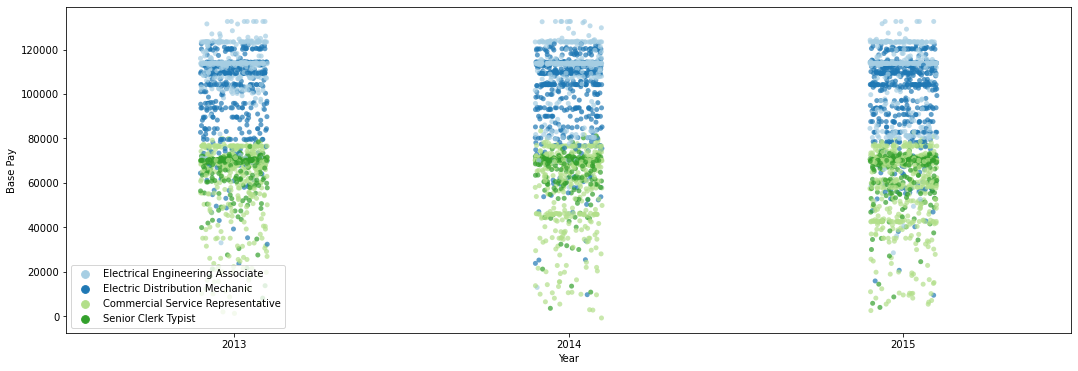

In [35]:
fig, ax = plt.subplots(figsize=(18,6))
ax.tick_params(rotation=0)
sns.stripplot(data=wp_df_final,x='Year',y='Base Pay',hue='Job Class Title',alpha = 0.7)
plt.legend(loc='best')

In [36]:
wp_df_final.columns
wp_df_final['% Over Base Pay'] = wp_df_final['% Over Base Pay'].astype(float)
wp_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5375 entries, 60159 to 134623
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Row ID                        5375 non-null   int64  
 1   Year                          5375 non-null   int64  
 2   Department Title              5375 non-null   object 
 3   Payroll Department            0 non-null      float64
 4   Record Number                 5375 non-null   object 
 5   Job Class Title               5375 non-null   object 
 6   Employment Type               5375 non-null   object 
 7   Hourly or Event Rate          1855 non-null   float64
 8   Projected Annual Salary       5375 non-null   float64
 9   Q1 Payments                   5375 non-null   float64
 10  Q2 Payments                   5375 non-null   float64
 11  Q3 Payments                   5375 non-null   float64
 12  Q4 Payments                   5375 non-null   float64
 1

In [37]:
water_df = wp_df_final.groupby(['Job Class Title', 'Year'])
water_data = water_df.mean()
water_data = water_data[['Total Payments', 'Base Pay', 'Average Benefit Cost', 'Payments Over Base Pay', '% Over Base Pay' ]]
water_data

Total Payments       Base Pay  \
Job Class Title                   Year                                  
Commercial Service Representative 2013    79185.857943   63915.847692   
                                  2014    74090.258489   61819.140036   
                                  2015    71674.257271   60432.365746   
Electric Distribution Mechanic    2013   136138.566930  100966.542154   
                                  2014   145294.207864  100250.088403   
                                  2015   150476.783502   98658.582043   
Electrical Engineering Associate  2013   135041.608928  112626.135681   
                                  2014   134910.748667  110610.399913   
                                  2015   134512.743278  108402.605758   
Senior Clerk Typist               2013    76221.443941   66864.109410   
                                  2014    76214.129220   67062.536532   
                                  2015    75765.573686   66248.221649   

                                        Average Benefit Cost  \
Job Class Title                   Year                         
Commercial Service Representative 2013              17111.02   
                                  2014              18124.69   
                                  2015              18755.63   
Electric Distribution Mechanic    2013              17111.02   
                                  2014              18124.69   
                                  2015              18755.63   
Electrical Engineering Associate  2013              17111.02   
                                  2014              18124.69   
                                  2015              18755.63   
Senior Clerk Typist               2013              17111.02   
                                  2014              18124.69   
                                  2015              18755.63   

                                        Payments Over Base Pay  \
Job Class Title                   Year                           
Commercial Service Representative 2013            15270.010250   
                                  2014            12271.118453   
                                  2015            11241.891525   
Electric Distribution Mechanic    2013            35172.024776   
                                  2014            45044.119461   
                                  2015            51818.201459   
Electrical Engineering Associate  2013            22415.473246   
                                  2014            24300.348754   
                                  2015            26110.137521   
Senior Clerk Typist               2013             9357.334531   
                                  2014             9151.592688   
                                  2015             9517.352036   

                                        % Over Base Pay  
Job Class Title                   Year                   
Commercial Service Representative 2013        41.240340  
                                  2014        36.675306  
                                  2015        34.238237  
Electric Distribution Mechanic    2013        35.509552  
                                  2014        46.762176  
                                  2015        54.017802  
Electrical Engineering Associate  2013        19.764058  
                                  2014        23.334638  
                                  2015        23.784986  
Senior Clerk Typist               2013        17.136193  
                                  2014        19.224462  
                                  2015        20.141546

In [38]:
len(wp_df_final)

5375

In [39]:
water_data['% increase Tot Pay'] = water_data['Total Payments'].groupby(level=0).pct_change()*100
water_data['% increase Base Pay'] = water_data['Base Pay'].groupby(level=0).pct_change()*100
water_data['% increase Benefits'] = water_data['Average Benefit Cost'].groupby(level=0).pct_change()*100
water_data['Cum % increase Tot Pay'] = water_data['% increase Tot Pay'].groupby(level=0).cumsum()
water_data['Cum % increase Base Pay'] = water_data['% increase Base Pay'].groupby(level=0).cumsum()
water_data['Cum % increase Benefits'] = water_data['% increase Benefits'].groupby(level=0).cumsum()
water_data

Total Payments       Base Pay  \
Job Class Title                   Year                                  
Commercial Service Representative 2013    79185.857943   63915.847692   
                                  2014    74090.258489   61819.140036   
                                  2015    71674.257271   60432.365746   
Electric Distribution Mechanic    2013   136138.566930  100966.542154   
                                  2014   145294.207864  100250.088403   
                                  2015   150476.783502   98658.582043   
Electrical Engineering Associate  2013   135041.608928  112626.135681   
                                  2014   134910.748667  110610.399913   
                                  2015   134512.743278  108402.605758   
Senior Clerk Typist               2013    76221.443941   66864.109410   
                                  2014    76214.129220   67062.536532   
                                  2015    75765.573686   66248.221649   

                                        Average Benefit Cost  \
Job Class Title                   Year                         
Commercial Service Representative 2013              17111.02   
                                  2014              18124.69   
                                  2015              18755.63   
Electric Distribution Mechanic    2013              17111.02   
                                  2014              18124.69   
                                  2015              18755.63   
Electrical Engineering Associate  2013              17111.02   
                                  2014              18124.69   
                                  2015              18755.63   
Senior Clerk Typist               2013              17111.02   
                                  2014              18124.69   
                                  2015              18755.63   

                                        Payments Over Base Pay  \
Job Class Title                   Year                           
Commercial Service Representative 2013            15270.010250   
                                  2014            12271.118453   
                                  2015            11241.891525   
Electric Distribution Mechanic    2013            35172.024776   
                                  2014            45044.119461   
                                  2015            51818.201459   
Electrical Engineering Associate  2013            22415.473246   
                                  2014            24300.348754   
                                  2015            26110.137521   
Senior Clerk Typist               2013             9357.334531   
                                  2014             9151.592688   
                                  2015             9517.352036   

                                        % Over Base Pay  % increase Tot Pay  \
Job Class Title                   Year                                        
Commercial Service Representative 2013        41.240340                 NaN   
                                  2014        36.675306           -6.434987   
                                  2015        34.238237           -3.260889   
Electric Distribution Mechanic    2013        35.509552                 NaN   
                                  2014        46.762176            6.725237   
                                  2015        54.017802            3.566953   
Electrical Engineering Associate  2013        19.764058                 NaN   
                                  2014        23.334638           -0.096904   
                                  2015        23.784986           -0.295014   
Senior Clerk Typist               2013        17.136193                 NaN   
                                  2014        19.224462           -0.009597   
                                  2015        20.141546           -0.588546   

                                        % increase Base Pay  \
Job Class Title          

In [40]:
water_data=water_data.reset_index()
water_data

,Job Class Title,Year,Total Payments,Base Pay,Average Benefit Cost,Payments Over Base Pay,% Over Base Pay,% increase Tot Pay,% increase Base Pay,% increase Benefits,Cum % increase Tot Pay,Cum % increase Base Pay,Cum % increase Benefits
0,Commercial Service Representative,2013,79185.857943,63915.847692,17111.02,15270.010250,41.240340,NaN,NaN,NaN,NaN,NaN,NaN
1,Commercial Service Representative,2014,74090.258489,61819.140036,18124.69,12271.118453,36.675306,-6.434987,-3.280419,5.924077,-6.434987,-3.280419,5.924077
2,Commercial Service Representative,2015,71674.257271,60432.365746,18755.63,11241.891525,34.238237,-3.260889,-2.243277,3.481108,-9.695876,-5.523696,9.405185
3,Electric Distribution Mechanic,2013,136138.566930,100966.542154,17111.02,35172.024776,35.509552,NaN,NaN,NaN,NaN,NaN,NaN
4,Electric Distribution Mechanic,2014,145294.207864,100250.088403,18124.69,45044.119461,46.762176,6.725237,-0.709595,5.924077,6.725237,-0.709595,5.924077
5,Electric Distribution Mechanic,2015,150476.783502,98658.582043,18755.63,51818.201459,54.017802,3.566953,-1.587536,3.481108,10.292189,-2.297131,9.405185
6,Electrical Engineering Associate,2013,135041.608928,112626.135681,17111.02,22415.473246,19.764058,NaN,NaN,NaN,NaN,NaN,NaN
7,Electrical Engineering Associate,2014,134910.748667,110610.399913,18124.69,24300.348754,23.334638,-0.096904,-1.789758,5.924077,-0.096904,-1.789758,5.924077
8,Electrical Engineering Associate,2015,134512.743278,108402.605758,18755.63,26110.137521,23.784986,-0.295014,-1.996010,3.481108,-0.391918,-3.785768,9.405185
9,Senior Clerk Typist,2013,76221.443941,66864.109410,17111.02,9357.334531,17.136193,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
random_df = water_data[['Job Class Title', 'Year', 'Cum % increase Tot Pay', 'Cum % increase Base Pay','Cum % increase Benefits']]
random_df
random_df.to_csv('Output/Water_Power.csv')


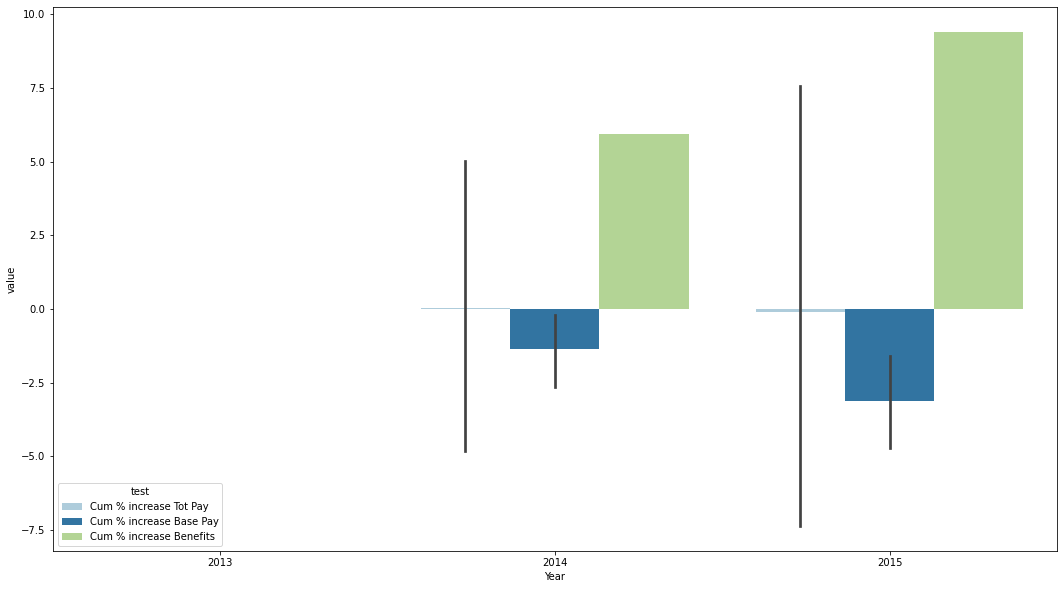

In [42]:
fig, ax = plt.subplots(figsize=(18,10))
data=pd.melt(water_data,id_vars='Year',value_vars=['Cum % increase Tot Pay','Cum % increase Base Pay','Cum % increase Benefits'],var_name='test')
sns.barplot(x='Year',y='value',data=data,hue='test')
ax.tick_params(rotation=0)

# plt.legend(loc='upper left')


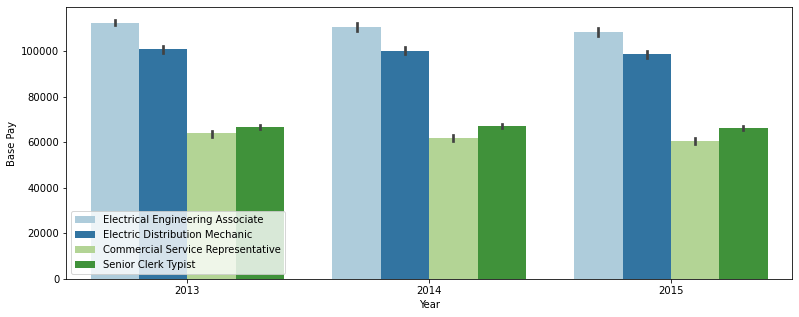

In [43]:
fig, ax1 = plt.subplots(figsize = (13,5))
sns.barplot(x='Year',y='Base Pay', data =wp_df_final, ax=ax1, hue='Job Class Title')
plt.legend(loc='best')

<AxesSubplot:xlabel='Year', ylabel='Total Payments'>

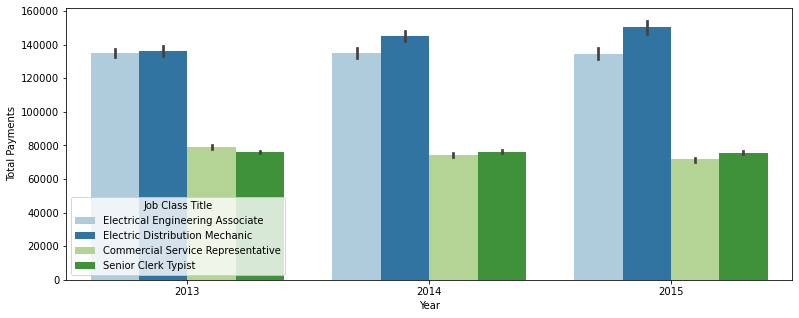

In [44]:
fig, ax1 = plt.subplots(figsize = (13,5))
sns.barplot(x='Year',y='Total Payments', data =wp_df_final, ax=ax1, hue='Job Class Title')

<AxesSubplot:xlabel='Year', ylabel='Total Payments'>

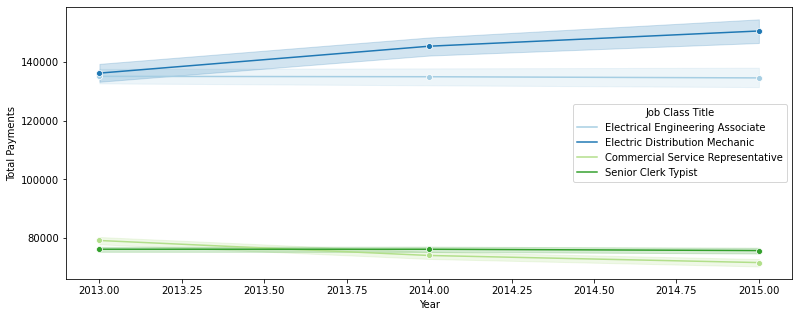

In [45]:
fig, ax1 = plt.subplots(figsize = (13,5))
sns.lineplot(x='Year',y='Total Payments', data =wp_df_final, ax=ax1, hue='Job Class Title', marker='o')

<AxesSubplot:xlabel='Year', ylabel='value'>

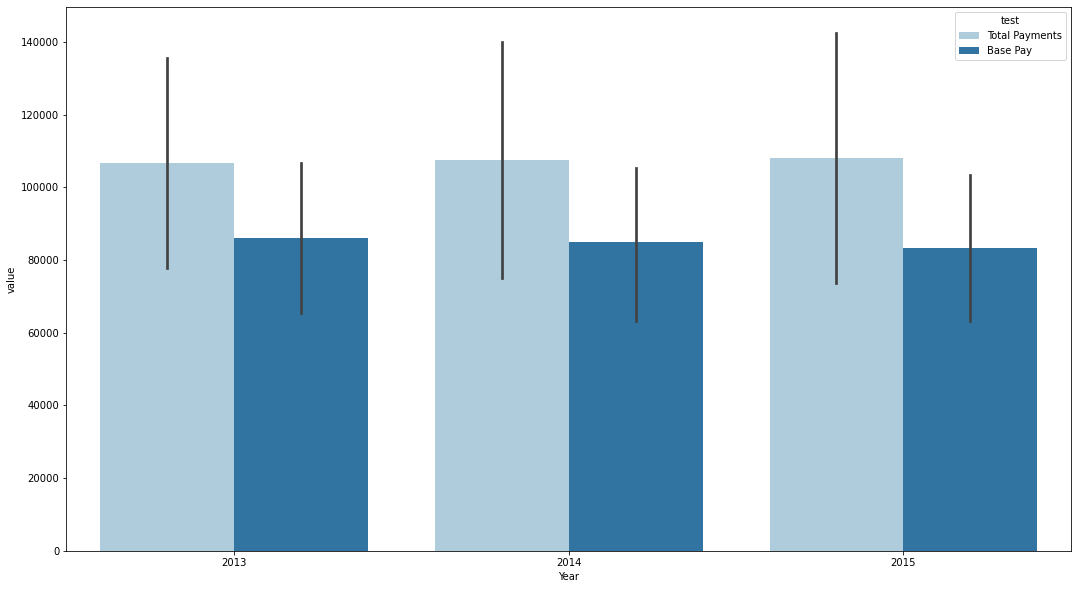

In [46]:
# fig, ax1 = plt.subplots(figsize = (13,5))
# sns.barplot(x='Year',y='Total Payments', data =wp_df_final, ax=ax1, hue='Job Class Title')

fig, ax = plt.subplots(figsize=(18,10))
dd1=pd.melt(water_data,id_vars='Year',value_vars=['Total Payments','Base Pay'],var_name='test')
sns.barplot(x='Year',y='value',data=dd1,hue='test')
# ax.tick_params(rotation=90)
# print(dd1)
# plt.legend(loc='upper left')